In [18]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Choosing Dataset

In [9]:
# path = r'../../data/2015_cleaned_droppedNaN.csv'
path = r'../../data/2015_cleaned_imputedNaN.csv'

## Preparing Dataset for MLP Classification

In [10]:
df = pd.read_csv(path)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,SexIsMale,AgeGroup
0,0.0,1.0,1.0,0.320255,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667
1,0.0,0.0,0.0,0.148641,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.183896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667
3,0.0,0.0,0.0,0.140453,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.666667
4,0.0,1.0,0.0,0.164904,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.833333


In [11]:
# Prepare X and y
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df.HeartDiseaseorAttack

**Under Sampling**

As seen in 03_check_target_balancing the dataset is heavily imbalanced towards patients with no heart disease or attack.

Since we have a lot of data (> 400k rows) we choose to do under sampling to accord for that difference.  

In [12]:
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [13]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1, test_size=0.2)

## MLP Classification

We run the Neural Network once with guessed hyper parameters to see if everything works as expected

In [14]:
classifier = MLPClassifier(hidden_layer_sizes=(20, 20), activation="logistic", solver="adam", random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.7504035572664426

## Results

**Balanced accuracy**
* Dropped NaN Values: 0.739210694891214
* Imputed NaN Values: 0.7504035572664426

There seems to be a slight increase in performance when using the rows with imputed values as well

## Results from Hyper Parameter Tuning

As performed in **mlp_02_hyper_parameter_tuning_automations.py**

The following hyper Parameters delivered the best results

* Imputed NaN Values bal_acc=**0.7529835435058014**

    Activation function: relu

    Architecture: (10,10)

    Solver: adam

* Dropped NaN Values bal_acc=**0.741786819043736**

    Activation function: relu

    Architecture: (20,20,20)

    Solver: adam
    

## Run with optimized settings

In [15]:
classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam", random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.7529835435058014

## Performance statistics

**Confusion Matrix**

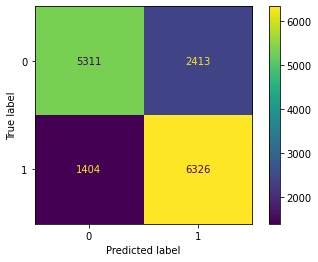

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

Confusion Matrix shows that there are a lot more false positives than there are false negatives